In [1]:
import pandas as pd
data = pd.read_csv("collegePlace.csv")

In [2]:
data.shape

(2966, 8)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [5]:
data['PlacedOrNot'].value_counts()

1    1639
0    1327
Name: PlacedOrNot, dtype: int64

In [6]:
data.groupby('PlacedOrNot').mean()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs
PlacedOrNot,,,,,
0,21.416729,0.556142,6.449887,0.287867,0.201959
1,21.541794,0.823063,7.589384,0.253813,0.184259


<AxesSubplot:xlabel='Hostel'>

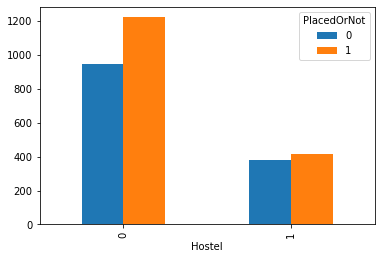

In [7]:
pd.crosstab(data.Hostel, data.PlacedOrNot).plot(kind='bar')

In [9]:
#scaling
from sklearn.preprocessing import MinMaxScaler
data[['Age']]= MinMaxScaler().fit_transform(data[['Age']])
data['Age']

0       0.272727
1       0.181818
2       0.272727
3       0.181818
4       0.272727
          ...   
2961    0.363636
2962    0.363636
2963    0.272727
2964    0.272727
2965    0.363636
Name: Age, Length: 2966, dtype: float64

In [11]:
cols=['Age', 'CGPA', 'Hostel', 'HistoryOfBacklogs']
X=data[cols]
y=data['PlacedOrNot']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.667383
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.029     
Dependent Variable: PlacedOrNot      AIC:              3966.9149 
Date:               2023-02-22 21:31 BIC:              3990.8948 
No. Observations:   2966             Log-Likelihood:   -1979.5   
Df Model:           3                LL-Null:          -2039.4   
Df Residuals:       2962             LLR p-value:      7.8970e-26
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age               -1.4203   0.2956 -4.8042 0.0000 -1.9998 -0.8409
CGPA               0.1175   0.0115 10.2491 0.0000  0.0951  0.1400


In [12]:
#Build Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'. format(logreg.score
(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.710


In [14]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[160  92]
 [ 80 262]]


In [15]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       252
           1       0.74      0.77      0.75       342

    accuracy                           0.71       594
   macro avg       0.70      0.70      0.70       594
weighted avg       0.71      0.71      0.71       594

